In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

# import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

2024-10-25 15:03:03.594327: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data collection

In [4]:
normal_path = "Brain_Data_Organised/Normal"
stroke_path = "Brain_Data_Organised/Stroke"

In [5]:
normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)

In [6]:
print("Images in Normal Data:",len(normal_folder))
print("Images in Stroke Data:",len(stroke_folder))

Images in Normal Data: 1551
Images in Stroke Data: 950


## Preprocesado de imágenes

In [7]:
# Every image have different size so we have to do resize of each image
# Standarizing the data
# but we have to mixed all the images to make a single data

# IMAGE PROCESSING
# Resize the Images

# Convert the images to numpy arrays

normal_path = "Brain_Data_Organised/Normal"
stroke_path = "Brain_Data_Organised/Stroke"

data = []

for img_file in normal_folder:
    image = Image.open("Brain_Data_Organised/Normal/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
for img_file in stroke_folder:
    image = Image.open("Brain_Data_Organised/Stroke/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [8]:
len(data)

2501

In [9]:
data[0].shape

(224, 224, 3)

In [10]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

## Class Labels

In [11]:
normal_label = [0]*len(normal_folder)
stroke_label = [1]*len(stroke_folder)

In [12]:
Target_label = normal_label + stroke_label

In [13]:
len(Target_label)

2501

## Convertir las imágenes y etiquetas objetivo en un array

In [14]:
# Convierte las listas de datos y etiquetas en matrices de numpy, facilitando su manejo.
x = np.array(data)
y = np.array(Target_label)

In [15]:
x[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [16]:
y

array([0, 0, 0, ..., 1, 1, 1])

## Dividir las imágenes para entrenamiento y prueba

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2250, 224, 224, 3)
(251, 224, 224, 3)
(2250,)
(251,)


## Escalar los datos

In [18]:
# Normaliza los valores de píxeles entre 0 y 1 para mejorar el rendimiento del modelo.
x_train_s = x_train/255
x_test_s = x_test/255

## Visualización de las imágenes

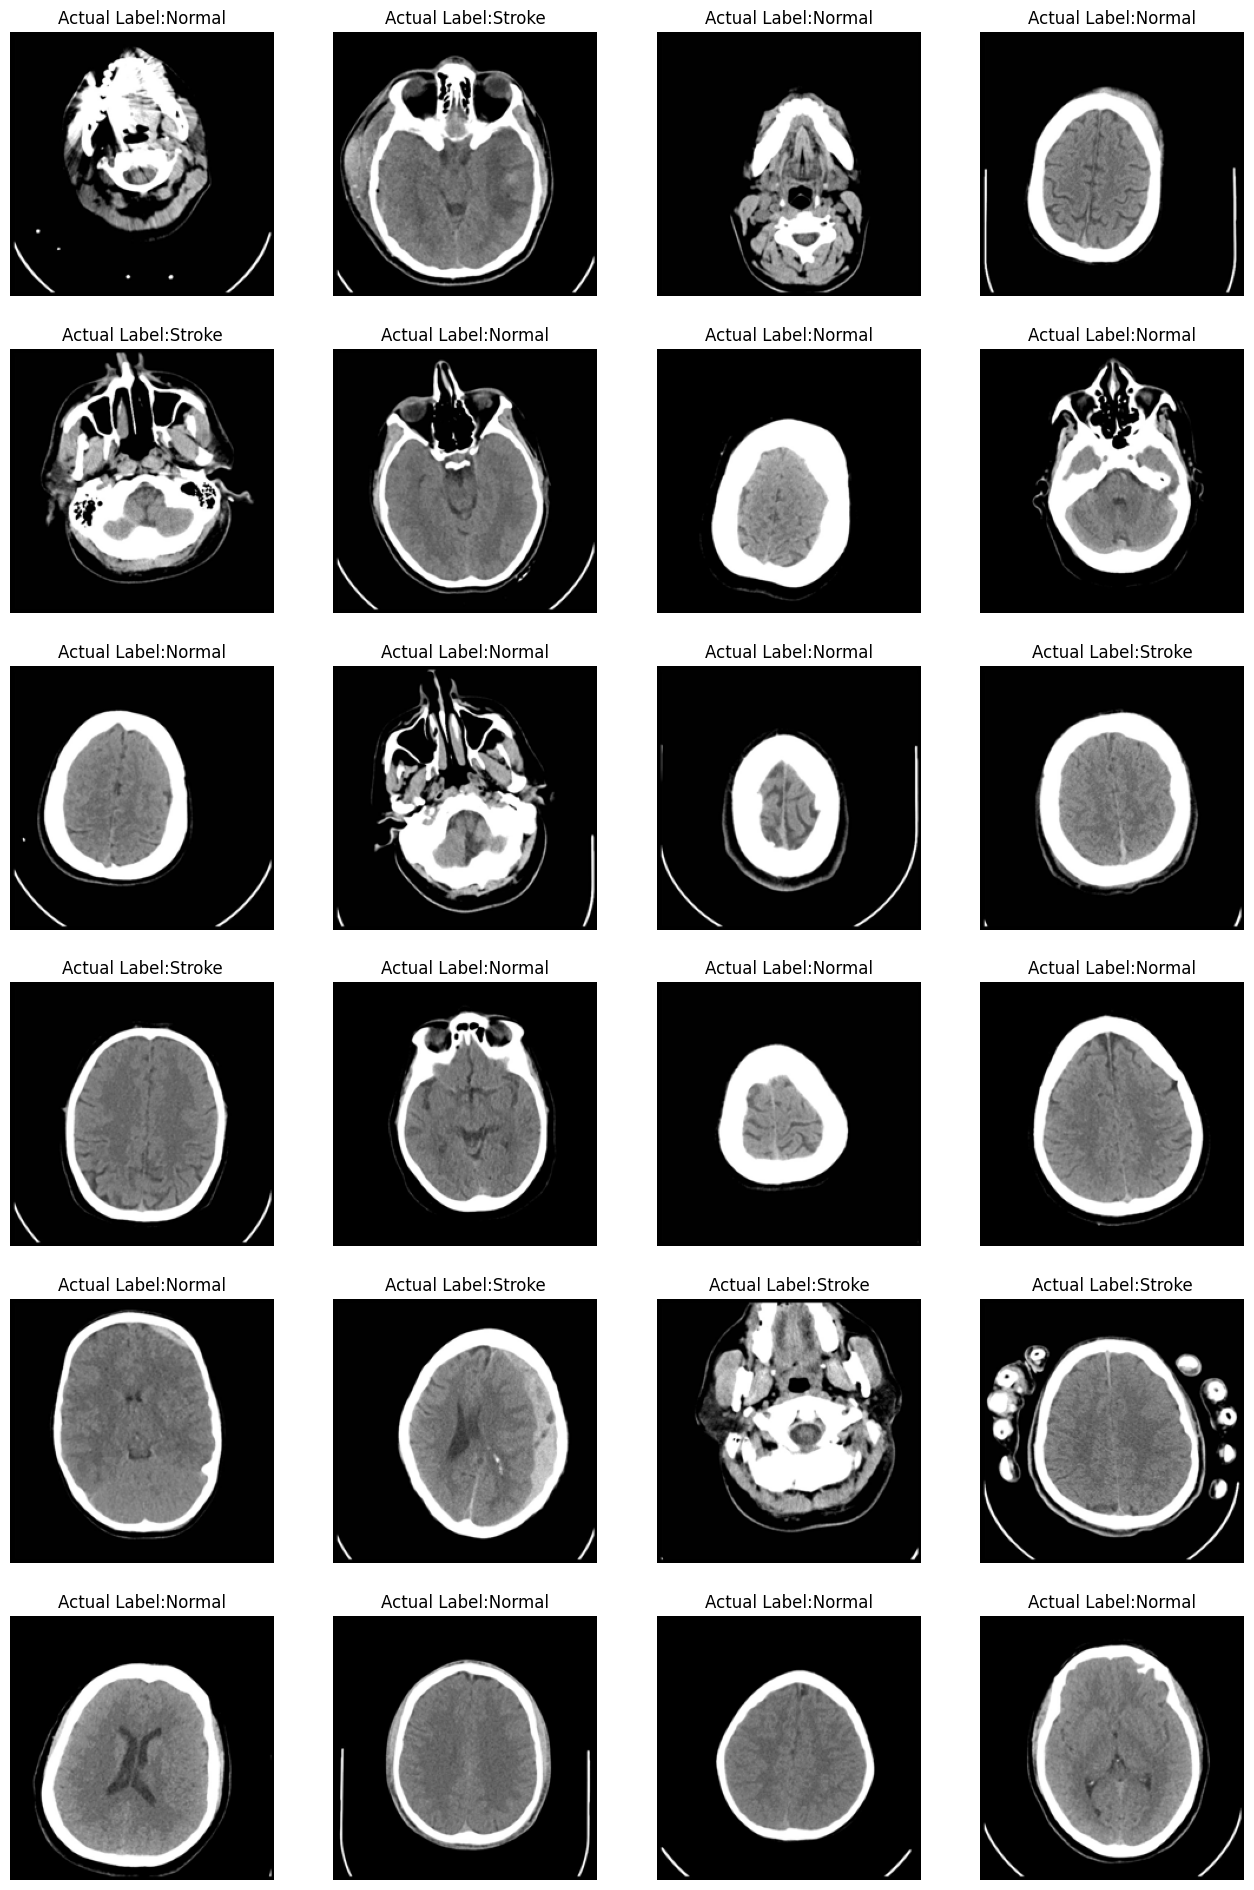

In [19]:
# Muestra algunas imágenes de entrenamiento con sus etiquetas.
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,24))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Actual Label:{class_labels[y_train[i]]}")
    plt.axis("off")

## Crear un modelo usando CNN

In [20]:
# Define una red neuronal convolucional con tres capas Conv2D para extracción de características, seguidas de capas MaxPooling2D para reducción de dimensionalidad. Luego, las capas densas (Dense) manejan la clasificación. La última capa Dense usa la activación sigmoid para la clasificación binaria.
model = Sequential()

model.add(Conv2D(filters=100,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=80,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="sigmoid"))

# Compila el modelo usando el optimizador Adam y la función de pérdida binary_crossentropy, dado que es un problema de clasificación binaria.
model.compile(optimizer="adam",loss="binary_crossentropy",
             metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 100)  │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 80)   │        72,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 80)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        46,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │    21,632,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,004,525 (83.94 MB)

 Trainable params: 22,004,525 (83.94 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Entrena el modelo con 10 épocas, usando batch_size de 32
history = model.fit(x_train_s,y_train,batch_size=32,
         epochs=10, validation_data=(x_test_s,y_test))

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.6013 - loss: 0.6728 - val_accuracy: 0.7610 - val_loss: 0.4851
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.8194 - loss: 0.3814 - val_accuracy: 0.9283 - val_loss: 0.1761
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9560 - loss: 0.1104 - val_accuracy: 0.9402 - val_loss: 0.1344
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9707 - loss: 0.0633 - val_accuracy: 0.9442 - val_loss: 0.1401
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9892 - loss: 0.0321 - val_accuracy: 0.9641 - val_loss: 0.1203
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.9910 - loss: 0.0295 - val_accuracy: 0.9641 - val_loss: 0.1545
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9947 - loss: 0.0194 - val_accuracy: 0.9641 - val_loss: 0.1530
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.9970 - loss: 0.0099 - val_accuracy: 0.9641 - v

In [31]:
# Guardar el modelo entrenado
model.save("model_brain_stroke.h5")
print("Modelo guardado como model_brain_stroke.h5")

Modelo guardado como model_brain_stroke.h5


## Evaluación de modelo en datos de prueba (test) y entrenamiento

In [22]:
loss, acc = model.evaluate(x_test_s,y_test)
print("Loss on Test Data:",loss)
print("Accuracy on Test Data:",acc)

loss, acc = model.evaluate(x_train_s,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 563ms/step - accuracy: 0.9627 - loss: 0.1409
Loss on Test Data: 0.16566111147403717
Accuracy on Test Data: 0.9561753273010254
71/71 ━━━━━━━━━━━━━━━━━━━━ 52s 737ms/step - accuracy: 0.9977 - loss: 0.0087
Loss on Train Data: 0.00790955126285553
Accuracy on Train Data: 0.9982222318649292


## Predicciones en las imágenes de prueba

In [23]:
# Predice las etiquetas de prueba y clasifica en 1 o 0 según el umbral de 0.5
y_pred_test = model.predict(x_test_s)
y_pred_test_label = [1 if i>=0.5 else 0 for i in y_pred_test]

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 792ms/step


In [24]:
print("Actual Label:",y_test[:10])
print("Predicted Label:",y_pred_test_label[:10])

Actual Label: [0 1 0 0 0 0 0 0 1 0]
Predicted Label: [0, 1, 0, 0, 0, 0, 0, 0, 1, 0]


## Evaluación de las métricas en datos de prueba

In [25]:
print("-----Metrics Evaluation On Test Data -----")
print()
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_test_label))
print()
print("Classification Report:\n",classification_report(y_test,y_pred_test_label))

-----Metrics Evaluation On Test Data -----

Confusion Matrix:
 [[156   6]
 [  5  84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       162
           1       0.93      0.94      0.94        89

    accuracy                           0.96       251
   macro avg       0.95      0.95      0.95       251
weighted avg       0.96      0.96      0.96       251



## Curva ROC

In [26]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

y_prob = model.predict(x_test_s)

fpr, tpr, threshold = roc_curve(y_test, y_prob)

# Compute ROC curve and ROC area
roc_auc = auc(fpr, tpr)
print(f"ROC - Area :{roc_auc}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 804ms/step
ROC - Area :0.9911222083506728


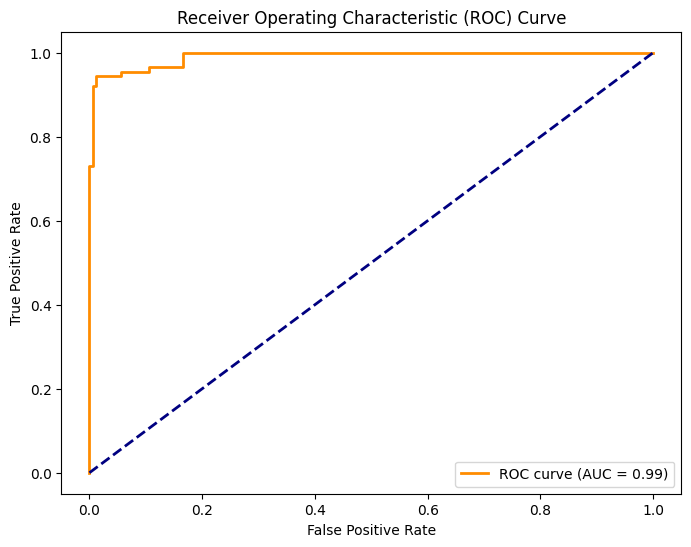

In [27]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Curva PR

In [28]:
y_prob = model.predict(x_test_s)

precision, recall, threshold = precision_recall_curve(y_test, y_prob)

# Compute ROC curve and ROC area
pr_auc = auc(recall,precision)
print(f"PR - Area :{pr_auc}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 864ms/step
PR - Area :0.986001740747138


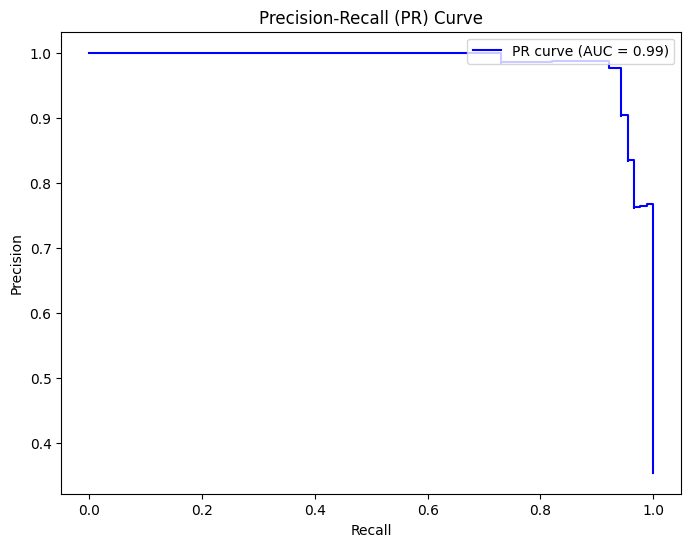

In [29]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='upper right')
plt.show()

## Predicciones de imágenes de datos de prueba

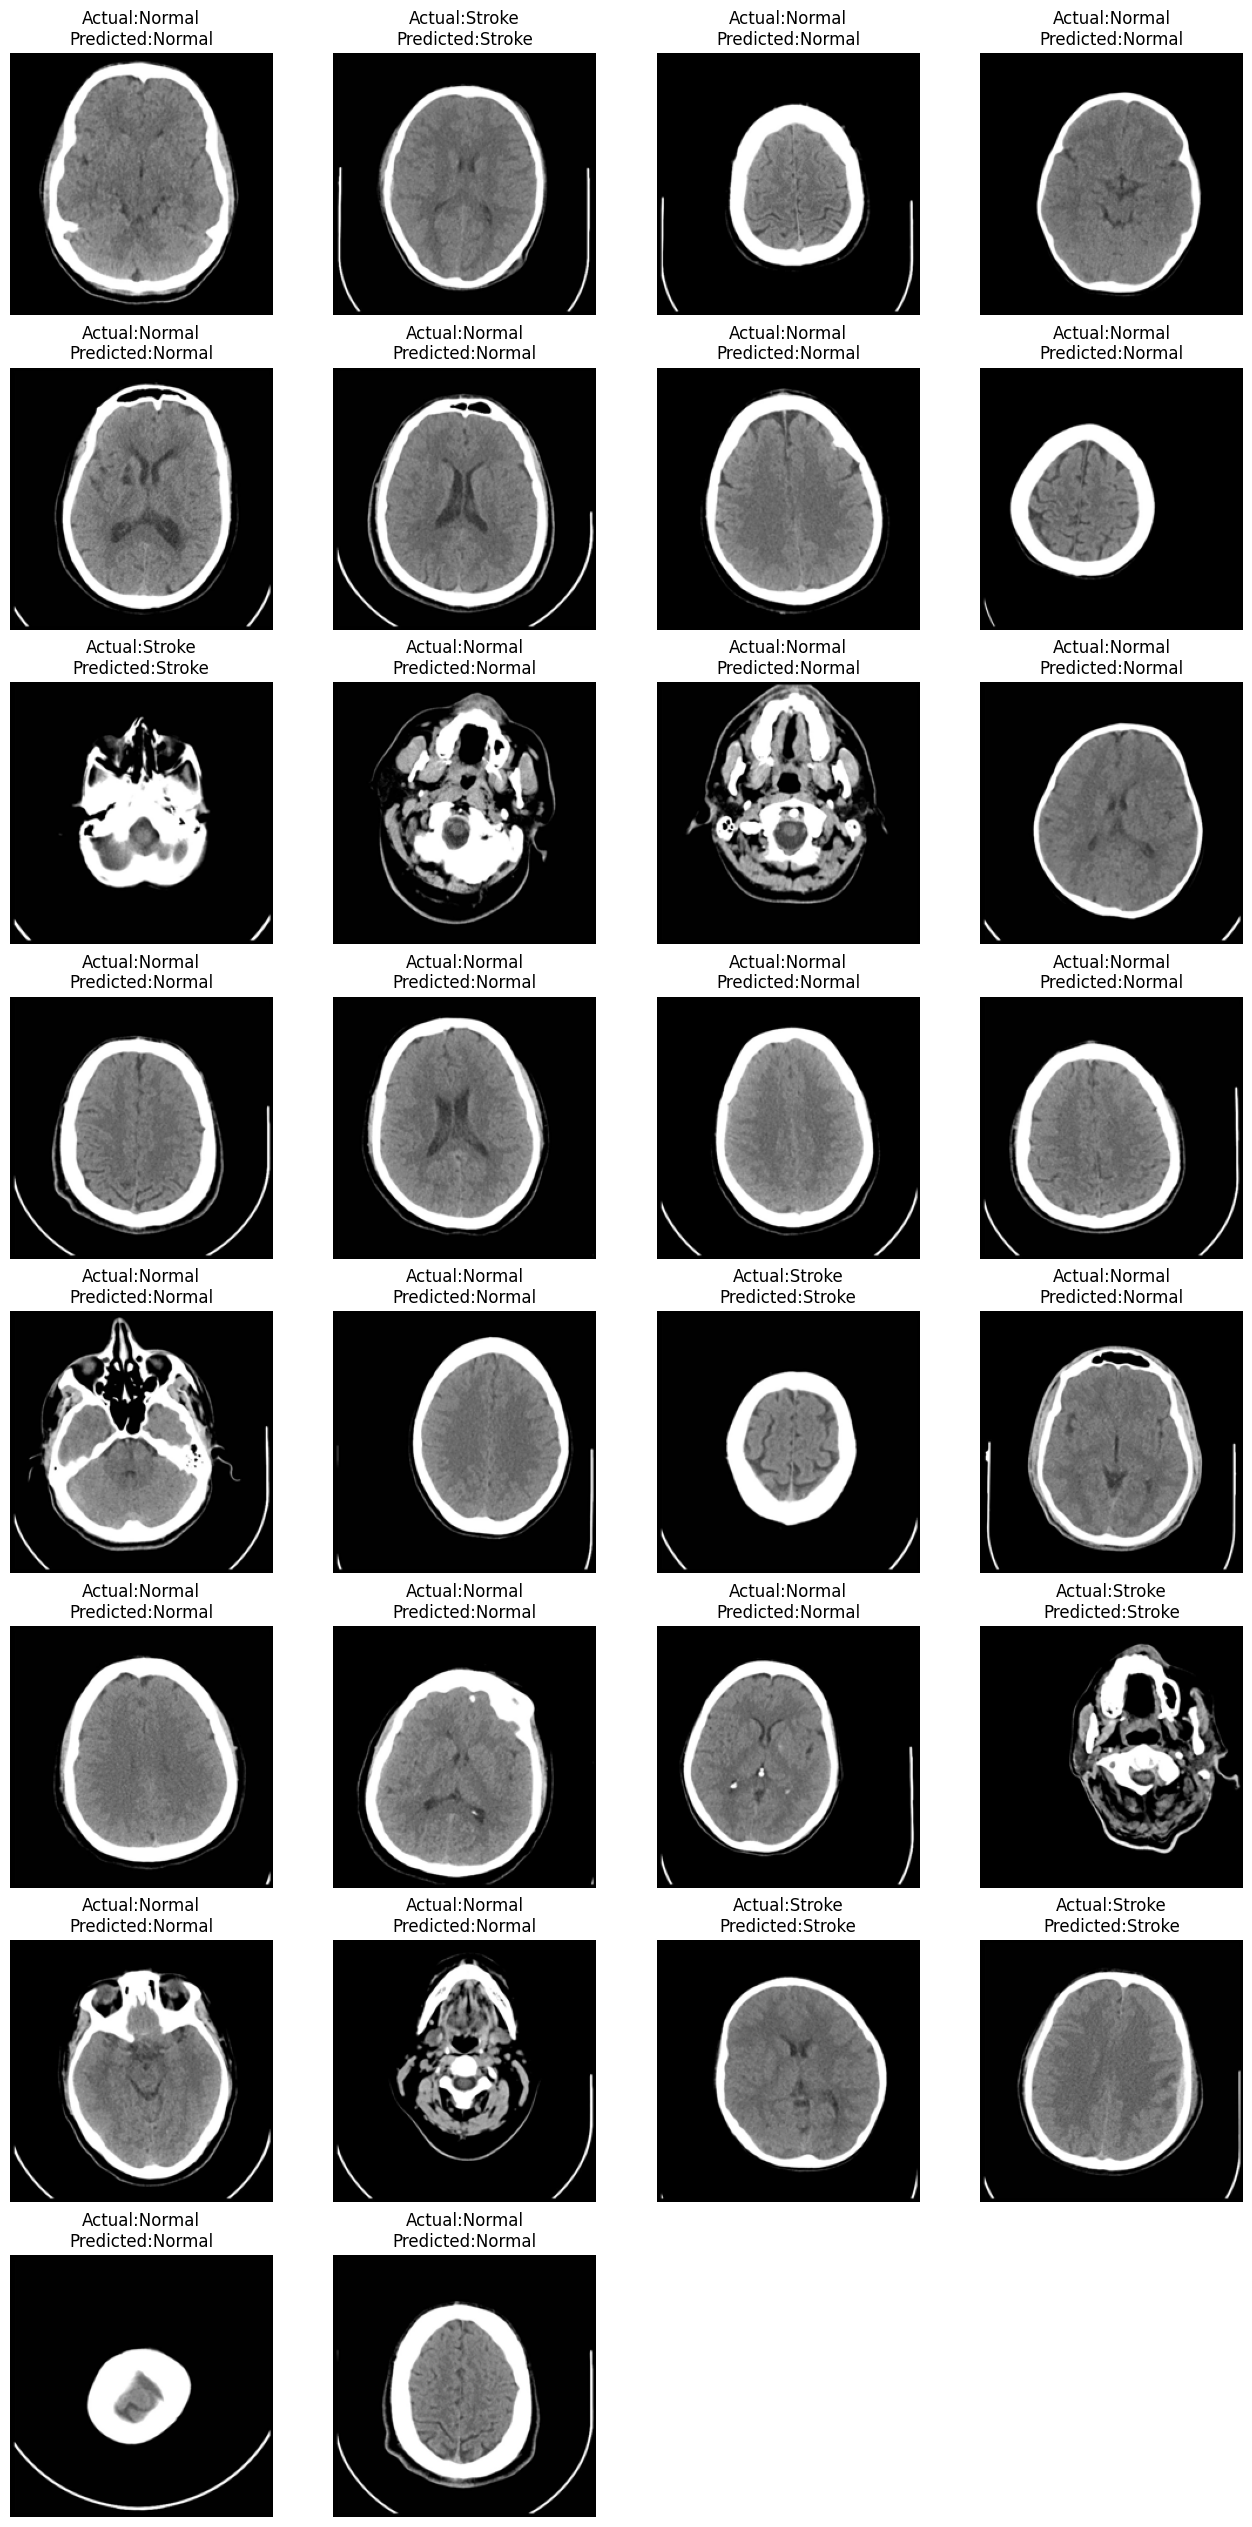

In [30]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,32))
for i in range(30):
    plt.subplot(8,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")